|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Leen alharbi -Lab12

# Q1: Import labraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q2: Read instagram_users.csv file

In [2]:
df = pd.read_csv('instagram_users.csv')

In [3]:
df.head()

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_length,Caption_zero,Non_image_percentage,Engagement_rate_like,Engagement_rate_comment,Location_tag_percentage,Average_hashtag_count,Promotional_keywords,Followers_keywords,Cosine_similarity,Post_interval,real_fake
0,44,48,325,33,1,0,12,0.0,0.0,0.00,0.00,0.000,0.0,0.0,0.000,0.111111,0.094985,fake
1,10,66,321,150,1,0,213,0.0,1.0,14.39,1.97,0.000,1.5,0.0,0.000,0.206826,230.412857,fake
2,33,970,308,101,1,1,436,0.0,1.0,10.10,0.30,0.000,2.5,0.0,0.056,0.572174,43.569939,fake
3,70,86,360,14,1,0,0,1.0,0.0,0.78,0.06,0.000,0.0,0.0,0.000,1.000000,5.859799,fake
4,3,21,285,73,1,0,93,0.0,0.0,14.29,0.00,0.667,0.0,0.0,0.000,0.300494,0.126019,fake


In [7]:
df.columns

Index([' Num_posts', 'Num_following', 'Num_followers', 'Biography_length',
       'Picture_availability', 'Link_availability', 'Average_caption_length',
       'Caption_zero', 'Non_image_percentage', 'Engagement_rate_like',
       'Engagement_rate_comment', 'Location_tag_percentage',
       'Average_hashtag_count', 'Promotional_keywords', 'Followers_keywords',
       'Cosine_similarity', 'Post_interval', 'real_fake'],
      dtype='object')

In [10]:
X = df[[' Num_posts', 'Num_following', 'Num_followers', 'Biography_length',
       'Picture_availability', 'Link_availability', 'Average_caption_length',
       'Caption_zero', 'Non_image_percentage', 'Engagement_rate_like',
       'Engagement_rate_comment', 'Location_tag_percentage',
       'Average_hashtag_count', 'Promotional_keywords', 'Followers_keywords',
       'Cosine_similarity', 'Post_interval']]
y = df['real_fake']

# Q3: Split tha dataset into training and testing

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Q4: Build three machine models 

## Q4.1: The first machine model-Decision Trees
- Model - Decision Trees.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Evaluating the Model

In [15]:
predictions = dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        fake       0.85      0.86      0.85      9672
        real       0.85      0.85      0.85      9602

    accuracy                           0.85     19274
   macro avg       0.85      0.85      0.85     19274
weighted avg       0.85      0.85      0.85     19274



--------------------------------------
accuracy

In [18]:
print(accuracy_score(y_test,predictions))

0.8517173394209816


Confusion matrix


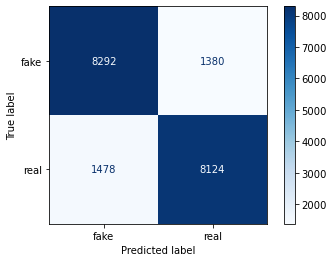

In [73]:
from sklearn.metrics import plot_confusion_matrix
print ('Confusion matrix')
plot_confusion_matrix(dtree, X_test, y_test, cmap ='Blues')  
plt.show()

## Q4.2: The second machine model-Random Forests
- Print the model's Random Forests.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
print(classification_report(y_test,rfc_pred))
print(accuracy_score(y_test,rfc_pred))

              precision    recall  f1-score   support

        fake       0.95      0.84      0.89      9672
        real       0.86      0.96      0.90      9602

    accuracy                           0.90     19274
   macro avg       0.90      0.90      0.90     19274
weighted avg       0.90      0.90      0.90     19274



----------------------

accuracy

In [54]:
print(accuracy_score(y_test,rfc_pred))

0.8984123689945004


In [41]:
rfc_pred = rfc.predict(X_test)

Confusion matrix


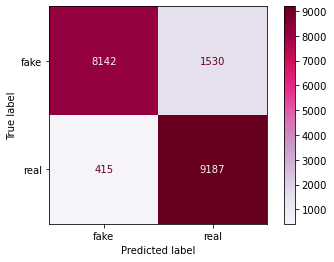

In [72]:
print ('Confusion matrix')
plot_confusion_matrix(rfc, X_test, y_test, cmap ='PuRd')  
plt.show()

## Q4.3: The third machine model-Naive Bayes
- Print the model's Naive Bayes.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [43]:
from sklearn.naive_bayes import GaussianNB

In [55]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

pred = GNB.predict(X_test)

In [56]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[3590 6082]
 [ 538 9064]]
              precision    recall  f1-score   support

        fake       0.87      0.37      0.52      9672
        real       0.60      0.94      0.73      9602

    accuracy                           0.66     19274
   macro avg       0.73      0.66      0.63     19274
weighted avg       0.73      0.66      0.63     19274



----------------------

accuracy

In [57]:
print(accuracy_score(y_test,pred))

0.6565321158036733


Confusion matrix


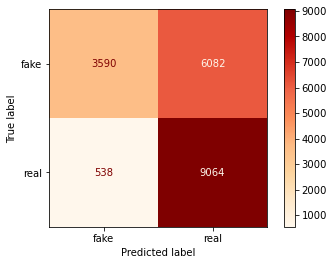

In [48]:
print ('Confusion matrix')
plot_confusion_matrix(GNB, X_test, y_test, cmap ='OrRd')  
plt.show()

# Q5.3: The third machine model-Logistic Regression
- Print the model's Logistic Regression.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [65]:
from  sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

pred = logmodel.predict(X_test)

In [74]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[6834 2838]
 [1689 7913]]
              precision    recall  f1-score   support

        fake       0.80      0.71      0.75      9672
        real       0.74      0.82      0.78      9602

    accuracy                           0.77     19274
   macro avg       0.77      0.77      0.76     19274
weighted avg       0.77      0.77      0.76     19274



----------------------

accuracy

In [ ]:
print(accuracy_score(y_test,pred))

Confusion matrix


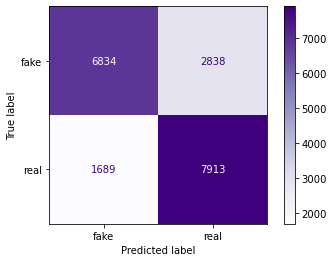

In [71]:
print ('Confusion matrix')
plot_confusion_matrix(logmodel, X_test, y_test, cmap ='Purples')  
plt.show()